popt: [-35.49872961   4.60709203]
系数A: -35.498729606783364
系数n: 4.60709203479532
系数pcov: [[115.44705177  -6.09331688]
 [ -6.09331688   0.32475341]]
系数yvals: [11.29008512 13.11638675 16.01905443 37.46564343 68.24976888 96.83689276]


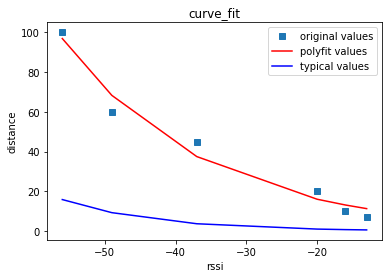

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 自定义由rssi求距离的函数
def get_distance(rssi, A, n):
    return 10**((abs(rssi) - A) / (10 * n))
 
# r = [13.0, 16.0, 20.0, 37.0, 49.0, 56.0]
# d = [7.0, 10.0, 20.0, 45.0, 60.0, 100.0]
r = [-13, -16, -20, -37, -49, -56]
d = [7, 10, 20, 45, 60, 100]


r = np.array(r)
d = np.array(d)
   
# 距离7.0 ？ 最近16
# 距离25.0 34
# 距离80.0 53

# 彩色线
# 距离7 13
# 距离10 16
# 距离20 20
# 距离45 37
# 距离60 49
# 距离100 56
#定义x、y散点坐标
 
param_bounds=([0,3],[49,4.5])
popt, pcov = curve_fit(get_distance, r, d) # bounds=param_bounds)
# popt, pcov = curve_fit(get_distance, r, d, bounds=param_bounds)
A = popt[0] 
n = popt[1]
yvals = get_distance(r, A, n)
ytr = get_distance(r, 20, 3.0)
print('popt:', popt)
print('系数A:', A)
print('系数n:', n)
print('系数pcov:', pcov)
print('系数yvals:', yvals)

#绘图
plot1 = plt.plot(r, d, 's',label='original values')
plot2 = plt.plot(r, yvals, 'r',label='polyfit values')
plot2 = plt.plot(r, ytr, 'b',label='typical values')
plt.xlabel('rssi')
plt.ylabel('distance')
plt.legend()
plt.title('curve_fit')
plt.show()